<a href="https://colab.research.google.com/github/ChitranshGuha/Rapido-Bike-Demand-Prediction/blob/main/Rapido_Bike_Request_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2023 00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2023 01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2023 02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2023 03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2023 04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#Split DateTime to Date and Time

In [8]:
# Convert 'datetime' to datetime type
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M')

# Extract time-based features
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year  # This will be 2011 or 2012

# Drop columns that leak info or aren't needed
df = df.drop(['datetime', 'casual', 'registered'], axis=1)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   hour        10886 non-null  int32  
 10  day         10886 non-null  int32  
 11  weekday     10886 non-null  int32  
 12  month       10886 non-null  int32  
 13  year        10886 non-null  int32  
dtypes: float64(3), int32(5), int64(6)
memory usage: 978.2 KB


In [10]:
X = df.drop('count', axis=1)
y = df['count']

#Linear Regression & Ridge Regression

* Similar performance
* No overfitting (train & validation errors are close)
* Baseline models

#Lasso Regression

* Performs similarly to Linear Regression
* Lasso applies L1 regularization (shrinks coefficients)

#XGBoost (XGBRegressor)

* Better training performance than Linear Regression (37.03 MAE)
* But validation error is higher (61.46 MAE) → Some overfitting
* Can improve by tuning hyperparameters like learning_rate and max_depth

#Random Forest Regressor

* Very low training error (22.30 MAE) but higher validation error (59.04 MAE)
* Overfitting is significant (memorizing training data)
* You can reduce overfitting by tuning:
** n_estimators (increase trees)
**  max_depth (reduce depth)
**  min_samples_split (increase to force generalization)


#Testing and Accuracy

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


RMSE: 39.242049965455124
R2 Score: 0.9533450032505897


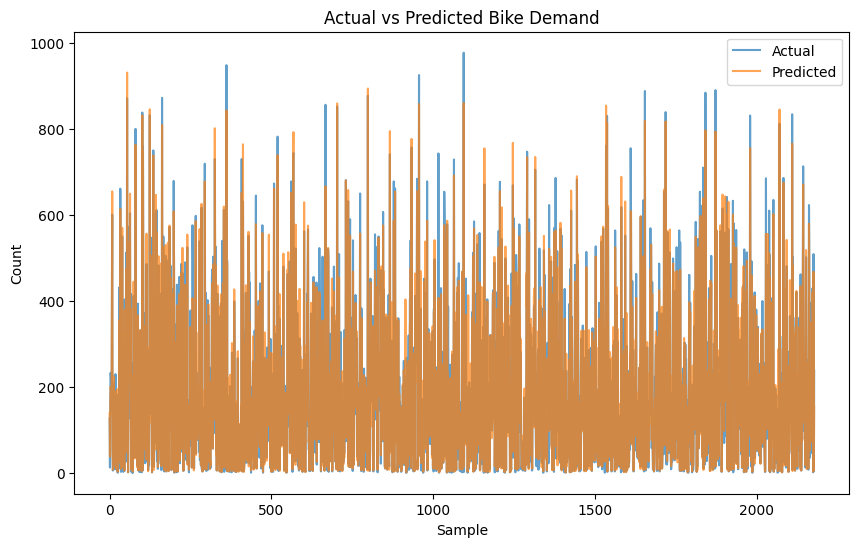

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title("Actual vs Predicted Bike Demand")
plt.xlabel("Sample")
plt.ylabel("Count")
plt.legend()
plt.show()


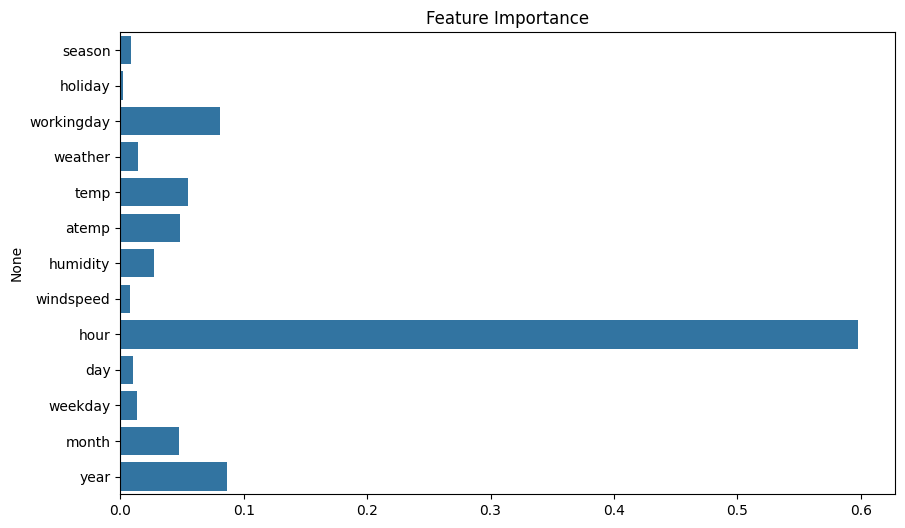

In [15]:
import seaborn as sns

# Get importance
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


#Check other models

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100),
    "SVR": SVR()
}

print(" Model Comparison:\n")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name:<20} | RMSE: {rmse:>7.2f} | R² Score: {r2:.4f}")


 Model Comparison:

Linear Regression    | RMSE:  141.14 | R² Score: 0.3965
Ridge                | RMSE:  141.14 | R² Score: 0.3965
Lasso                | RMSE:  141.20 | R² Score: 0.3960
Random Forest        | RMSE:   39.24 | R² Score: 0.9533
XGBoost              | RMSE:   37.38 | R² Score: 0.9577
SVR                  | RMSE:  146.61 | R² Score: 0.3487


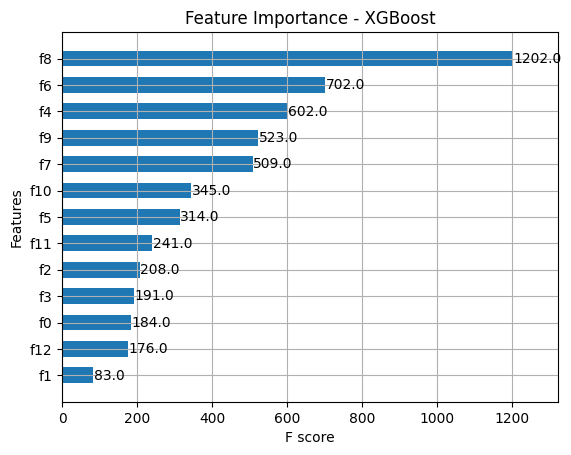

In [18]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(models["XGBoost"], height=0.6)
plt.title("Feature Importance - XGBoost")
plt.show()


In [19]:
import joblib
joblib.dump(models["XGBoost"], "rapido_xgboost_model.pkl")


['rapido_xgboost_model.pkl']